In [3]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
from tqdm import tqdm
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt


In [4]:
def extraer_caracteristicas_1(ruta_completa,clase):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])
    clase=clase



    # Crear una fila con todos los datos
    caracteristicas = [
        ruta_completa,
        mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,
        clase
    ]
    return caracteristicas


In [5]:
# funcion extractor de caracteristicas datos nuevos
def extraer_caracteristicas_nuevos(ruta_completa):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])




    # Crear una fila con todos los datos
    caracteristicas = [mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,

    ]
    return caracteristicas

In [6]:
data = []

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Lista para almacenar las filas del dataset enfermos
#data = []
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/enfermos_todas_hombre_mujeres/export"
clase="sick"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

       # nombres_columnas = [
       # 'Ruta',
       # 'Media señal',
       # 'Desviación estándar de la señal',
       # 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
       # 'Amplitud máxima',
       # 'Amplitud mínima',
       # 'Promedio del centroides espectrales',
       # 'Promedio del ancho de banda espectral',
       # 'Promedio del rolloff espectral',
       # 'Promedio de la tasa de cruce por cero',
       # 'RMS (Root Mean Square)',
       # 'Clase'
   ## ]

#df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


100%|██████████| 1354/1354 [02:07<00:00, 10.64it/s]


In [9]:
# Lista para almacenar las filas del dataset hombre sanos
#data = []
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/sanos_hombres_mujeres/export"
clase="sano"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

100%|██████████| 687/687 [00:44<00:00, 15.34it/s]


In [10]:
# funcion para nuevos datos

def nuevos_datos(directorio_audio):

    datos_nuevos = []
    clase="desconocido"


# Iterar sobre los archivos de audio en el directorio
    for archivo_audio in tqdm(os.listdir(directorio_audio)):
            if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
                ruta_completa = os.path.join(directorio_audio, archivo_audio)
                # Extraer características 1
                fila = extraer_caracteristicas_nuevos(ruta_completa)

                # Agregar la fila a la lista de datos
                datos_nuevos.append(fila)
                df_nuevos = pd.DataFrame(datos_nuevos)

    return df_nuevos




In [11]:
nombres_columnas = [
        'Ruta',
        'Media señal',
        'Dstandar',#Desviación estándar de la señal
        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
        'Amáxima',#Amplitud maxima
        'Amín',#Amplitud mínima
        'AvgCS', # Promedio del centroides espectrales
        'AvgBws',#Promedio del ancho de banda espectral
        'Avgrolloff',#Promedio del rolloff espectral
        'AvgCrossZ',#Promedio de la tasa de cruce por cero
        'RMS ',#RMS (Root Mean Square)
        'Clase'
    ]

df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


In [12]:
print(df)

                                                   Ruta  Media señal  \
0     /content/drive/MyDrive/PROYECTO_FINAL/enfermos...     0.000212   
1     /content/drive/MyDrive/PROYECTO_FINAL/enfermos...    -0.000394   
2     /content/drive/MyDrive/PROYECTO_FINAL/enfermos...     0.000291   
3     /content/drive/MyDrive/PROYECTO_FINAL/enfermos...     0.000053   
4     /content/drive/MyDrive/PROYECTO_FINAL/enfermos...     0.000109   
...                                                 ...          ...   
2036  /content/drive/MyDrive/PROYECTO_FINAL/sanos_ho...     0.000565   
2037  /content/drive/MyDrive/PROYECTO_FINAL/sanos_ho...     0.000506   
2038  /content/drive/MyDrive/PROYECTO_FINAL/sanos_ho...     0.000083   
2039  /content/drive/MyDrive/PROYECTO_FINAL/sanos_ho...    -0.000063   
2040  /content/drive/MyDrive/PROYECTO_FINAL/sanos_ho...    -0.000415   

      Dstandar      MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0     0.221247 -203.598648  174.003159  -0.848443 -23.611488

In [13]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/PATH/Hombre_frases_path"
###clase="sick"
#recorrer_archivos_audio(directorio_audio,clase)


In [14]:
print(df.describe())

       Media señal     Dstandar       MFCC_1       MFCC_2       MFCC_3  \
count  2041.000000  2041.000000  2041.000000  2041.000000  2041.000000   
mean     -0.002485     0.169235  -201.862534   142.500061   -18.298199   
std       0.016945     0.053150    43.464443    30.967344    26.473400   
min      -0.157546     0.042450  -368.580475    42.513683   -93.747116   
25%      -0.000107     0.129600  -230.164017   120.552490   -36.241241   
50%       0.000076     0.162253  -204.211319   139.752151   -18.880692   
75%       0.000284     0.201403  -174.958511   164.524368    -0.691808   
max       0.005719     0.374774   -21.968611   232.361237    66.196556   

            MFCC_4       MFCC_5       MFCC_6       MFCC_7       MFCC_8  ...  \
count  2041.000000  2041.000000  2041.000000  2041.000000  2041.000000  ...   
mean    -19.176683   -28.475712    -6.868766     8.000731     4.396277  ...   
std      16.431587    16.521515    15.504835    13.790057    12.798373  ...   
min     -74.44386

<ipython-input-15-865cca46b406>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method="pearson")


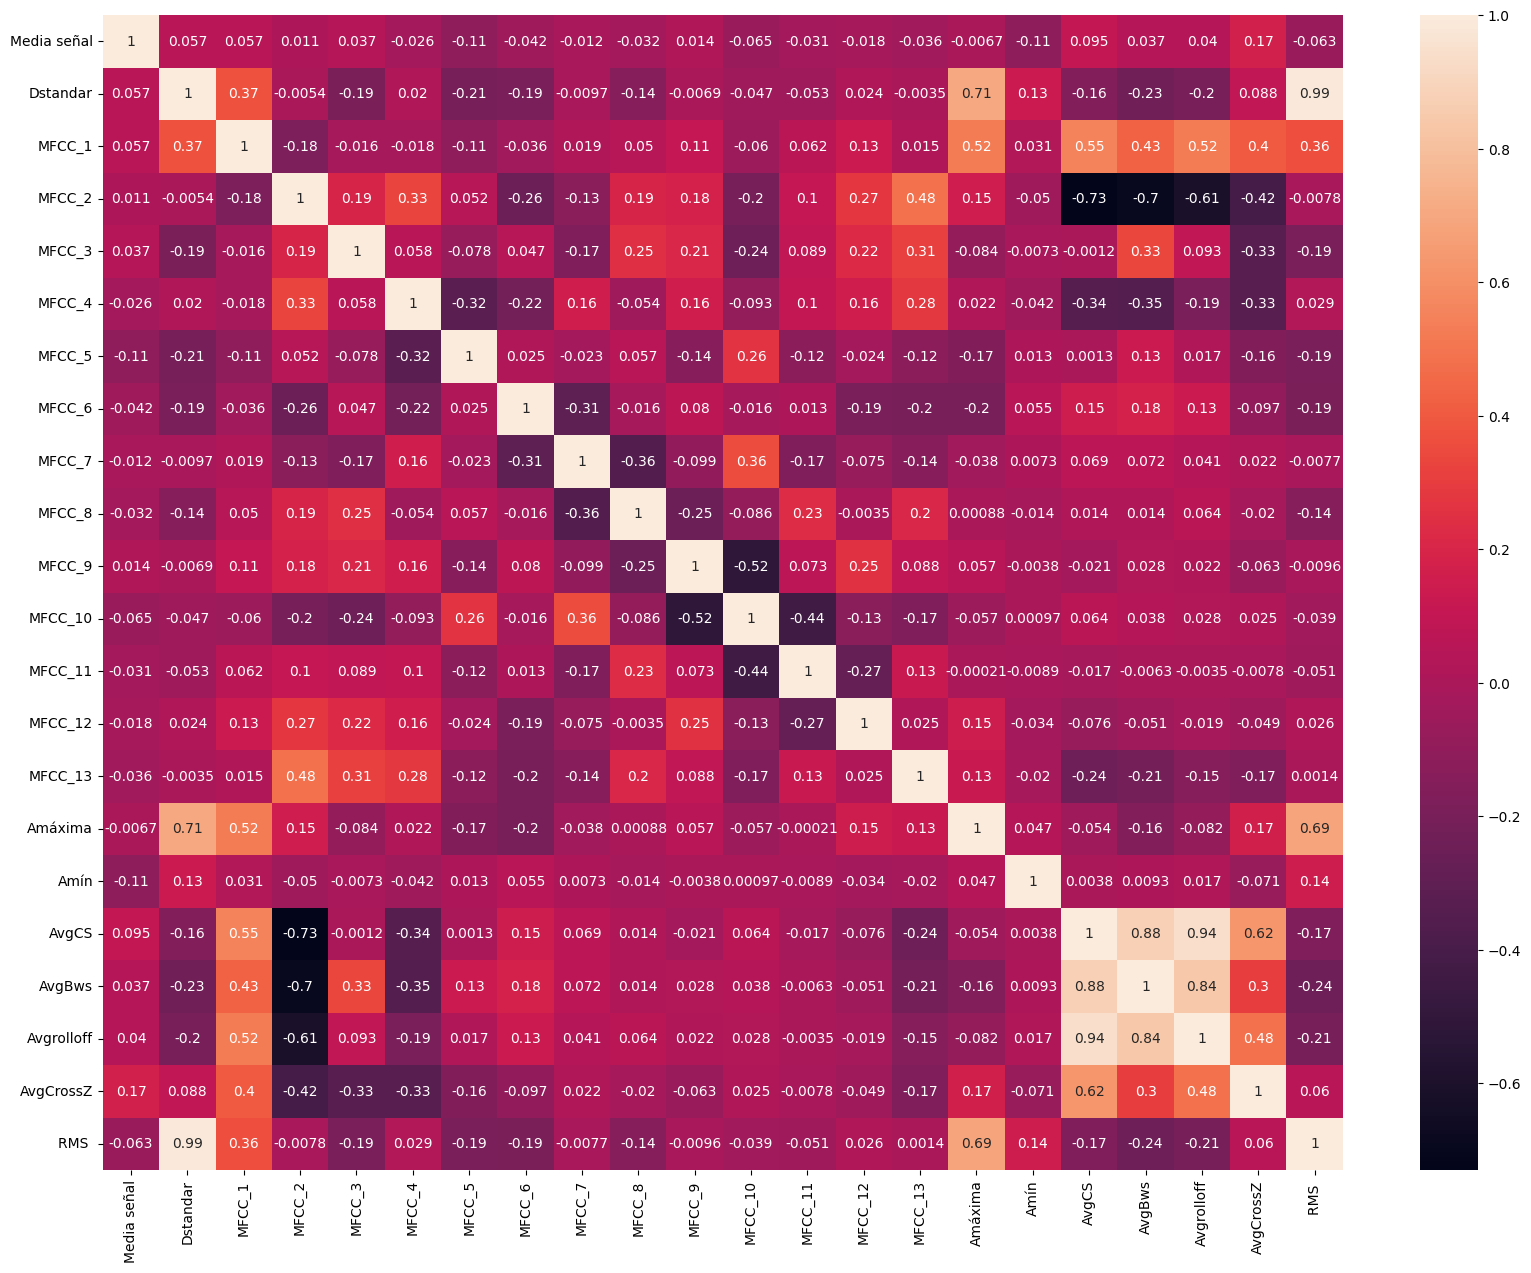

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



corr_df = df.corr(method="pearson")

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

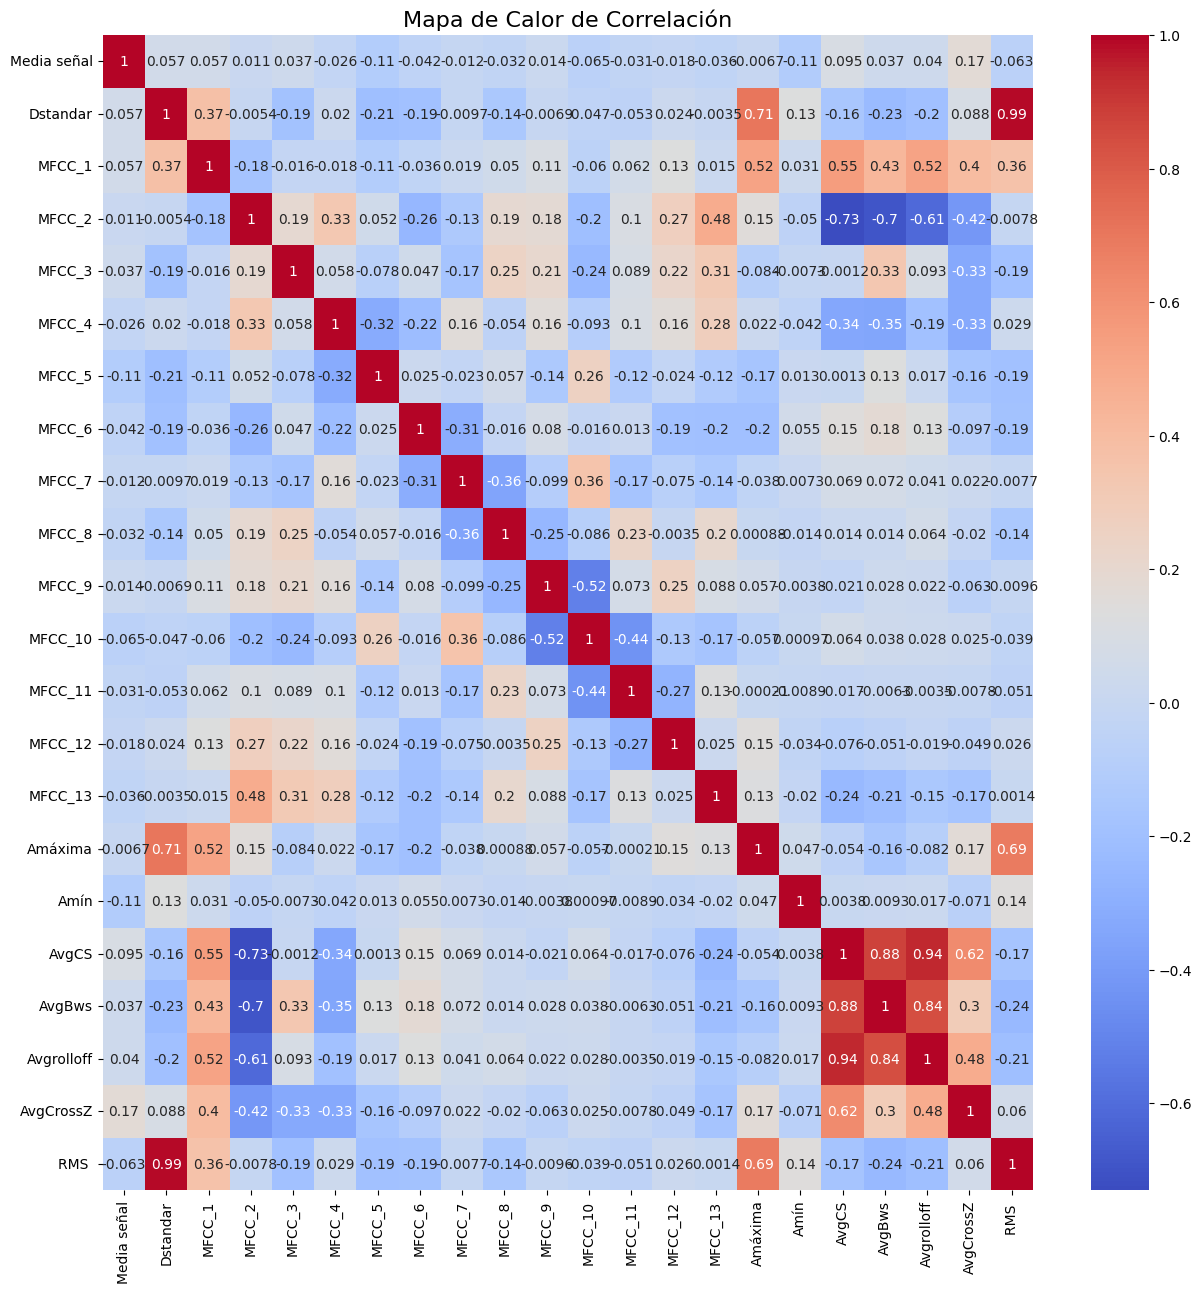

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df y corr_df

# Crear una figura y ejes más grandes
fig, ax = plt.subplots(figsize=(15, 15))

# Crear el mapa de calor
sns.heatmap(corr_df, cmap='coolwarm', annot=True, ax=ax)

# Establecer el título
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Mostrar el mapa de calor
plt.show()

In [17]:
df['Clase'] = df['Clase'].map({'sick': 1, 'sano': 0})

In [18]:
df = df.drop('Ruta', axis=1)

X = np.array(df.drop(['Clase'],1))
y = np.array(df['Clase'])
X.shape
df

<ipython-input-18-4b67d6dff44b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Clase'],1))


,Media señal,Dstandar,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_12,MFCC_13,Amáxima,Amín,AvgCS,AvgBws,Avgrolloff,AvgCrossZ,RMS,Clase
0,0.000212,0.221247,-203.598648,174.003159,-0.848443,-23.611488,4.095771,12.983047,-31.629698,-15.329629,...,3.628854,4.765277,0.889053,0.000000,916.593560,1364.923778,1379.593173,0.034801,0.211691,1
1,-0.000394,0.246436,-111.214272,141.009583,-4.112024,-7.820776,-45.904152,4.175006,23.918943,-2.760360,...,-5.137012,30.035673,0.781513,0.000014,1601.902180,2203.528221,3299.317383,0.059225,0.243490,1
2,0.000291,0.217159,-252.967316,166.925629,35.660683,-3.403091,-29.674986,6.641043,-17.894094,10.894828,...,14.931800,5.484111,0.530140,0.000004,690.353130,1262.718469,881.665039,0.020973,0.213819,1
3,0.000053,0.199383,-216.098526,159.769394,-17.801723,-25.351851,-35.523823,2.549157,-3.534539,11.599912,...,-10.149856,2.400179,0.497984,0.000000,952.993783,1290.571320,1266.152344,0.044678,0.196496,1
4,0.000109,0.183465,-151.921799,140.086838,0.269669,-11.125966,-28.982672,-16.409653,12.686049,-5.591802,...,-8.897948,-2.063018,0.559642,0.000000,1295.470874,1926.992803,2031.811523,0.040318,0.180750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,0.000565,0.157136,-192.016083,164.215836,-37.132828,-18.451574,-8.830174,-6.031417,-3.380558,11.603949,...,15.181127,-13.768450,0.512715,0.000013,1047.048910,1346.701853,1496.151330,0.038270,0.154651,0
2037,0.000506,0.215795,-248.503418,153.451004,15.261247,-3.907525,-3.369242,5.782655,9.785728,0.936441,...,-6.115865,-4.948894,0.548672,0.000002,761.188456,1467.923575,1020.520020,0.016532,0.210597,0
2038,0.000083,0.134173,-216.302200,201.367004,-38.002705,-4.974300,-18.938168,-29.329718,10.800496,11.457781,...,15.361176,-1.074535,0.850048,0.000000,933.407504,1035.757952,1254.437256,0.045602,0.129253,0
2039,-0.000063,0.110712,-278.585114,131.954346,10.638890,-10.060069,-56.021496,12.052641,10.749830,16.058668,...,-10.650711,-2.234592,0.368215,0.000000,1020.237963,1521.859301,1193.247070,0.040527,0.107454,0


In [19]:
# Cardinalidad de las variables categóricas
cardinalidad_categoricas = df['Clase'].nunique()
print(f"Cardinalidad de la variable categórica 'Clase': {cardinalidad_categoricas}")

Cardinalidad de la variable categórica 'Clase': 2


In [22]:
#df = df.drop('Ruta', axis=1)

#X = np.array(df.drop(['Clase'],1))
#y = np.array(df['Clase'])
#X.shape

In [21]:
# Verificar si hay algún valor nulo en el DataFrame
hay_nulos = df.isnull().any().any()

# Imprimir el resultado
if hay_nulos:
    print("El DataFrame tiene valores nulos.")
else:
    print("El DataFrame no tiene valores nulos.")

El DataFrame no tiene valores nulos.


In [24]:
# Verificar desequilibrio en las clases
desequilibrio_clases = df['Clase'].value_counts()
print("Distribución de clases:")
print(desequilibrio_clases)
# 1= enfermo
# 2= sano

Distribución de clases:
1    1354
0     687
Name: Clase, dtype: int64


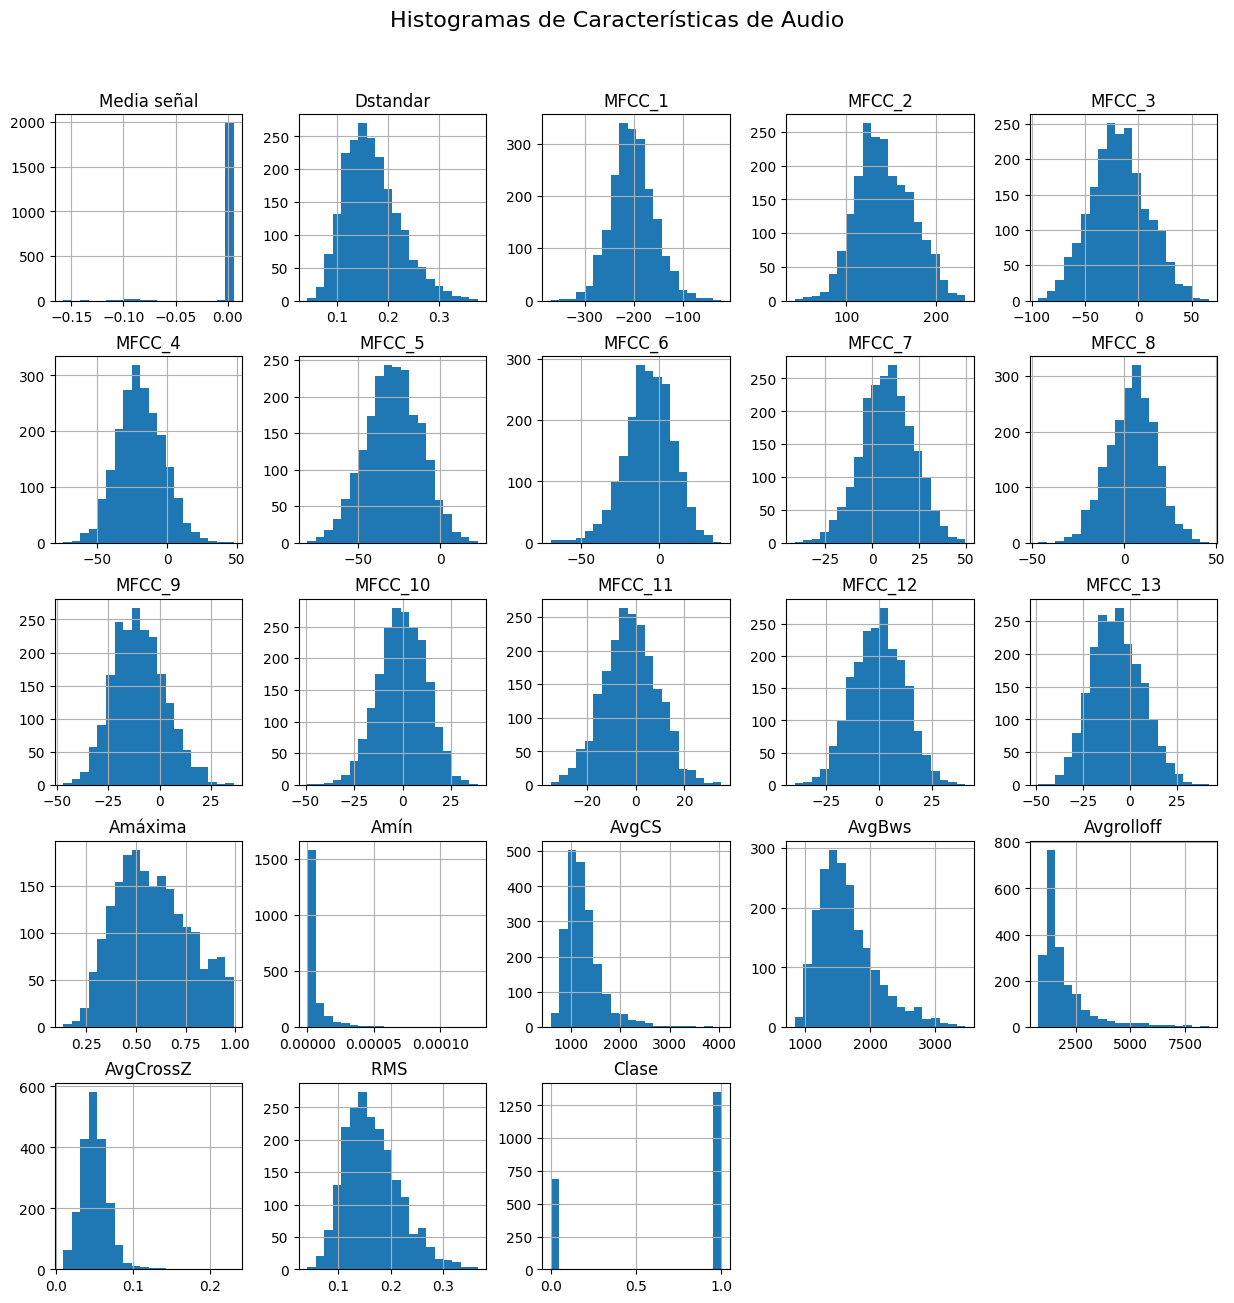

In [25]:
# Visualizar histogramas
df.hist(bins=20, figsize=(15, 15))
plt.suptitle('Histogramas de Características de Audio', y=0.95, fontsize=16)
plt.show()

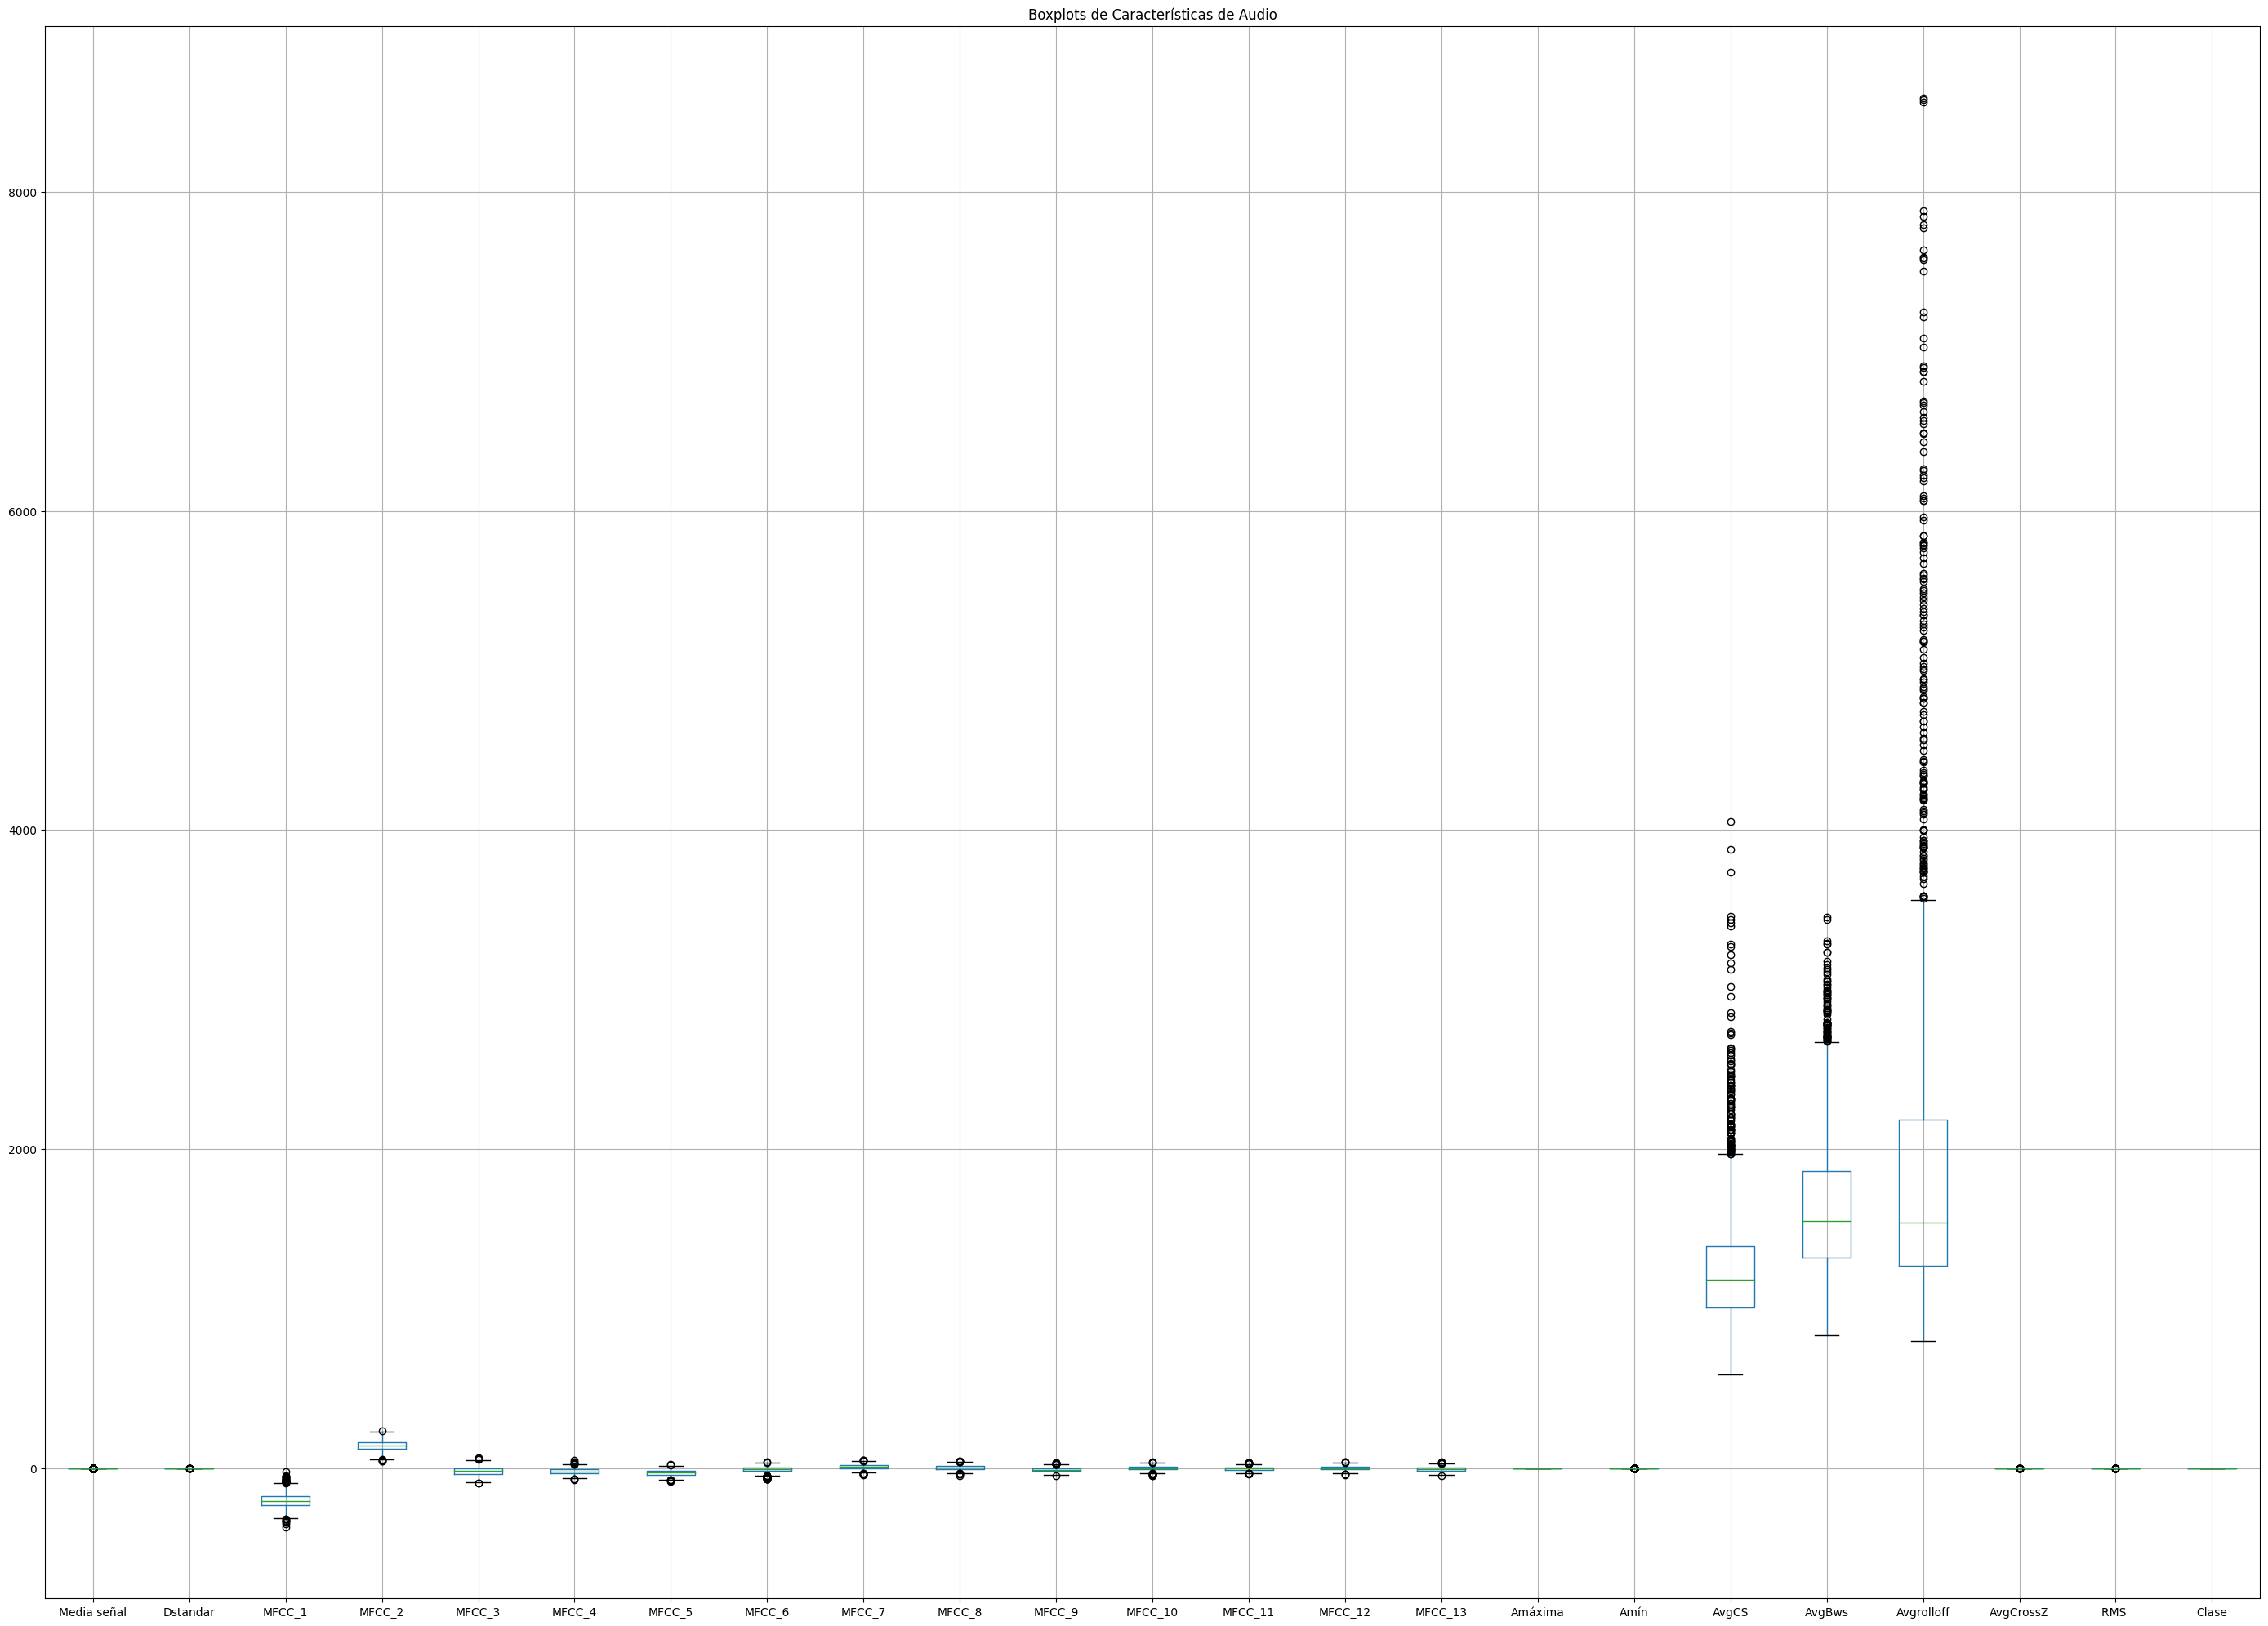

In [26]:
# Visualizar boxplots para identificar valores atípicos
df.boxplot(figsize=(35, 25))
plt.title('Boxplots de Características de Audio')
plt.show()

In [27]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb

model = linear_model.LogisticRegression()
model.fit(X,y)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions = model.predict(X)
print(predictions)

[1 1 1 ... 0 1 0]


In [29]:
model.score(X,y)

0.7104360607545321

In [30]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [31]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=8, random_state=seed,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.696691 (0.018575)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [32]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7286063569682152


In [33]:
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/personas sanas"
X_new = nuevos_datos(directorio_audio)
model.predict(X_new)

100%|██████████| 70/70 [00:22<00:00,  3.15it/s]


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


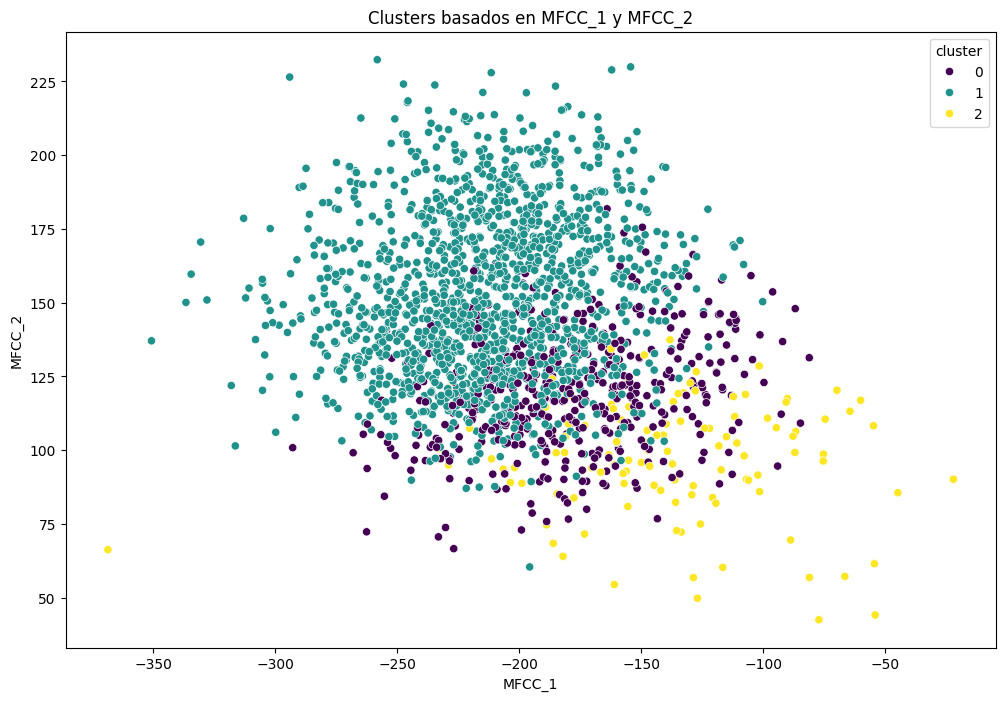

In [34]:
from sklearn.cluster import KMeans
# Obtener características para clustering (excluyendo la columna 'Clase')
features_for_clustering = df.drop('Clase', axis=1)

# Aplicar K-Means con, por ejemplo, 3 clusters (ajusta según tus necesidades)
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

import seaborn as sns

# Seleccionar dos características para visualización
feature1, feature2 = 'MFCC_1', 'MFCC_2'

# Visualizar clusters en un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x=feature1, y=feature2, hue='cluster', data=df, palette='viridis', legend='full')
plt.title(f'Clusters basados en {feature1} y {feature2}')
plt.show()